#LGBM & XGBM

#Eploratort Data Analysis

In [1]:
import pandas as pd
import numpy as np
df_train=pd.read_csv("/content/Titanic_train.csv")
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
df_test=pd.read_csv("/content/Titanic_test.csv")
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [5]:
df_train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [6]:
df_test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

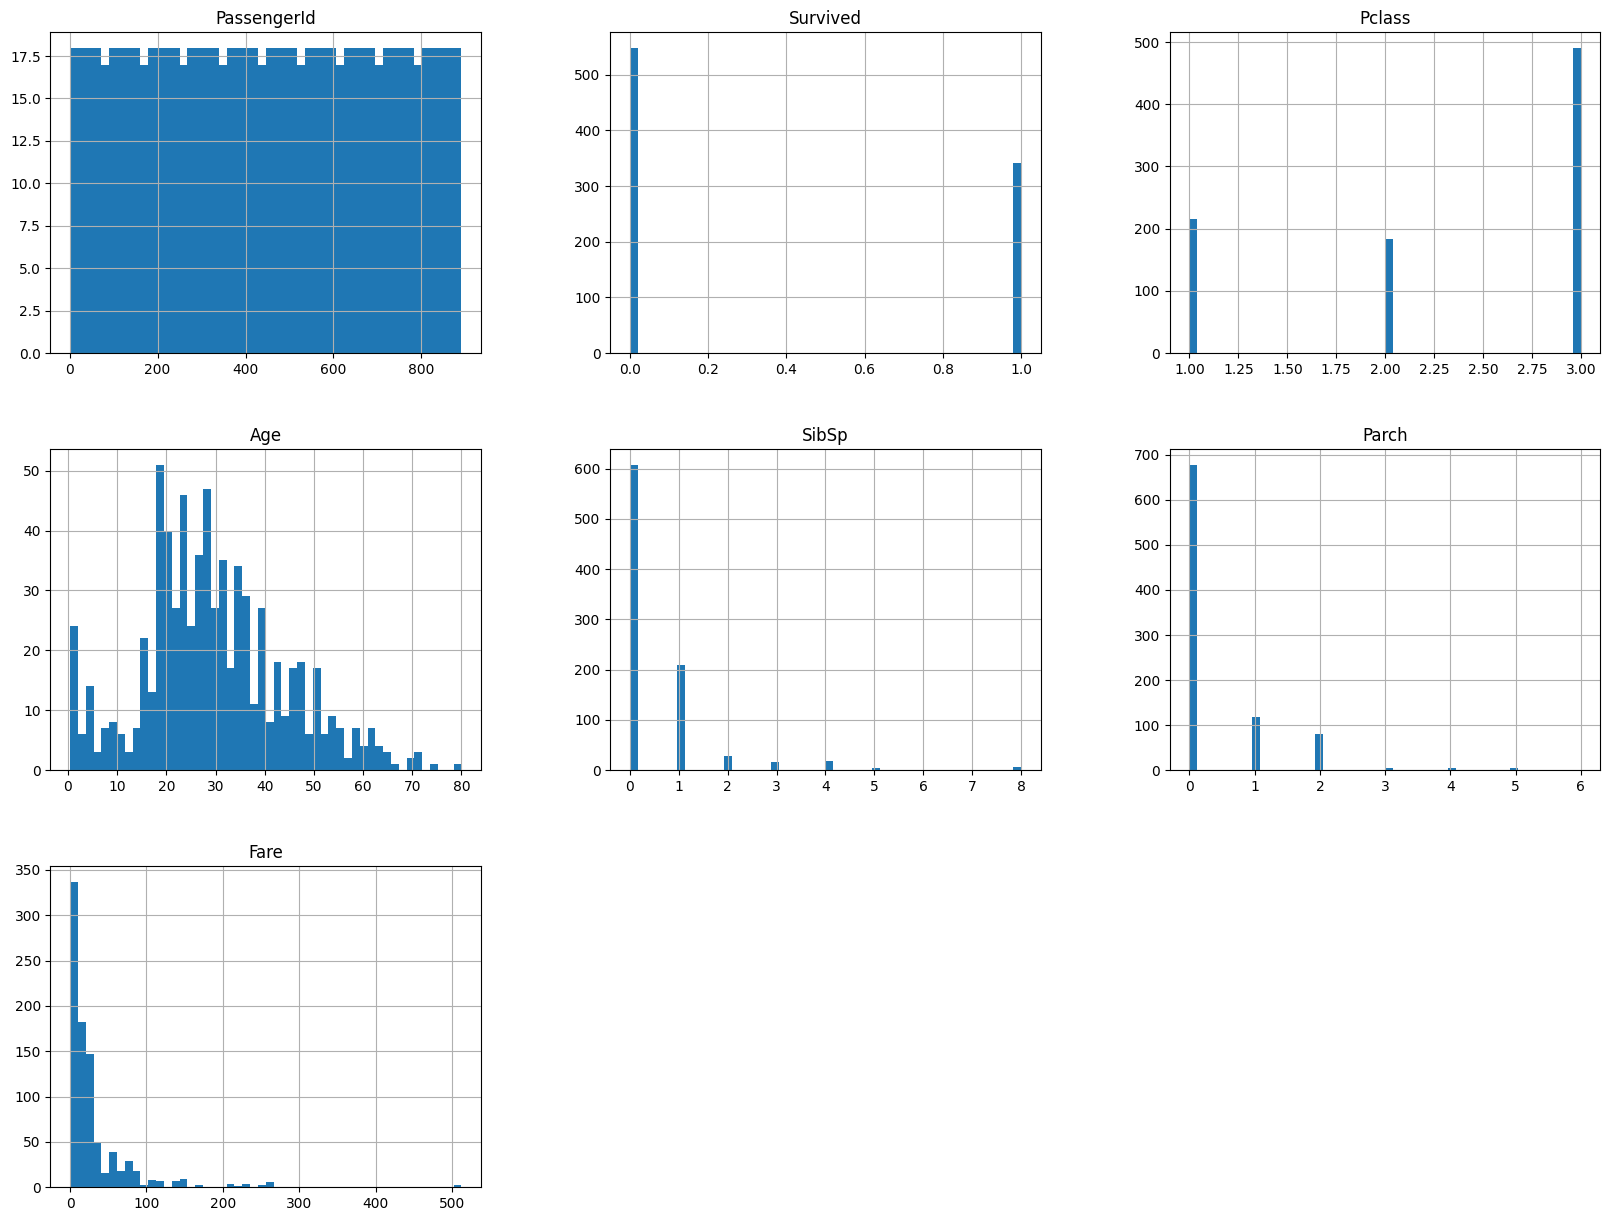

In [7]:
#histograms for df_train
df_train.hist(bins=50,figsize=(20,15))

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>],
       [<Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

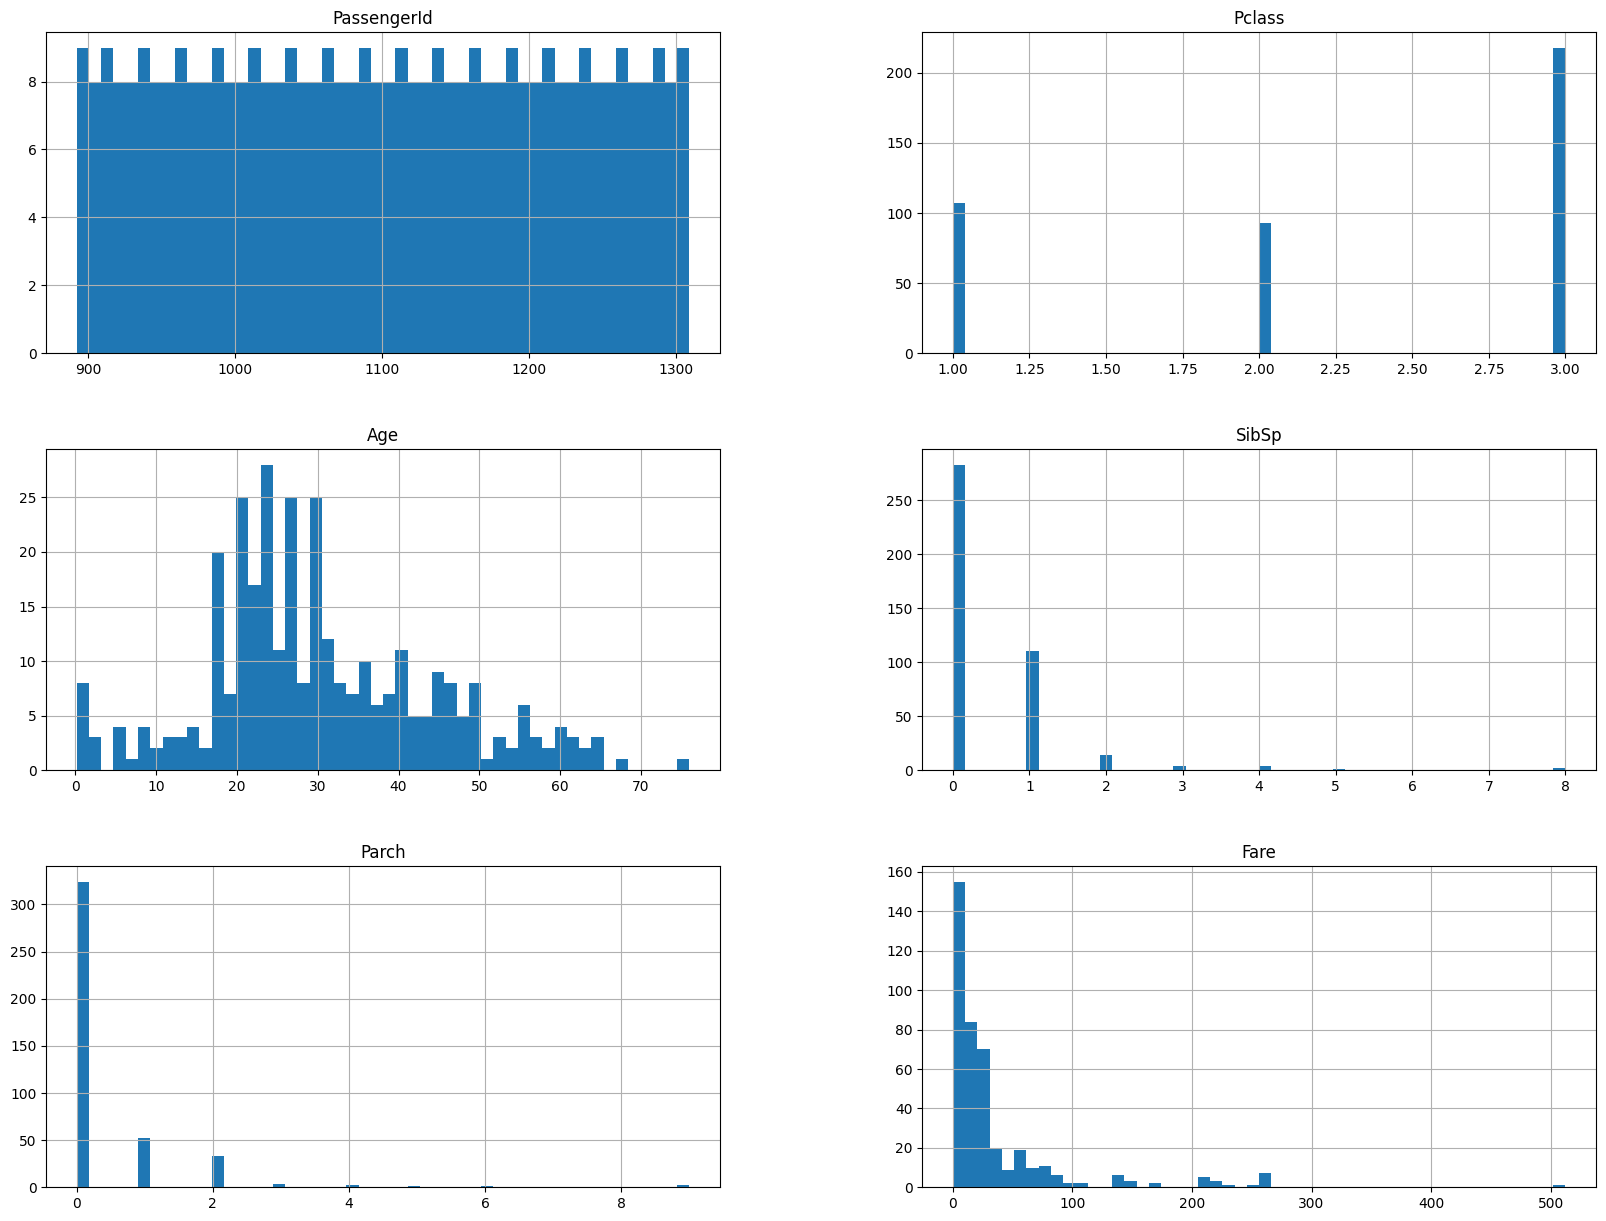

In [8]:
#histograms for df_test
df_test.hist(bins=50,figsize=(20,15))

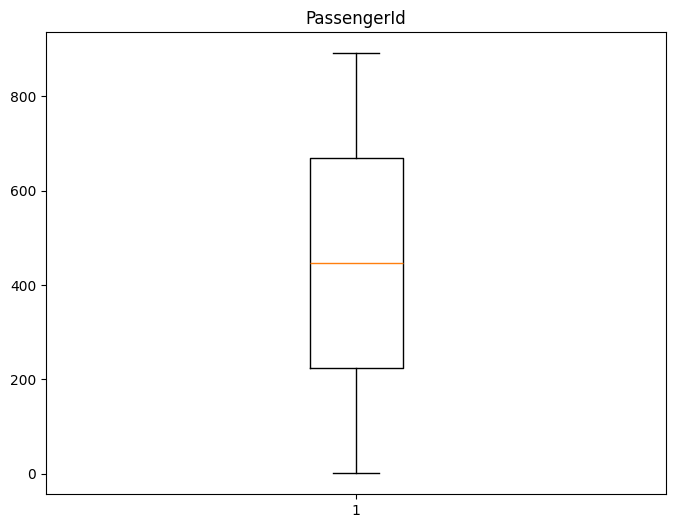

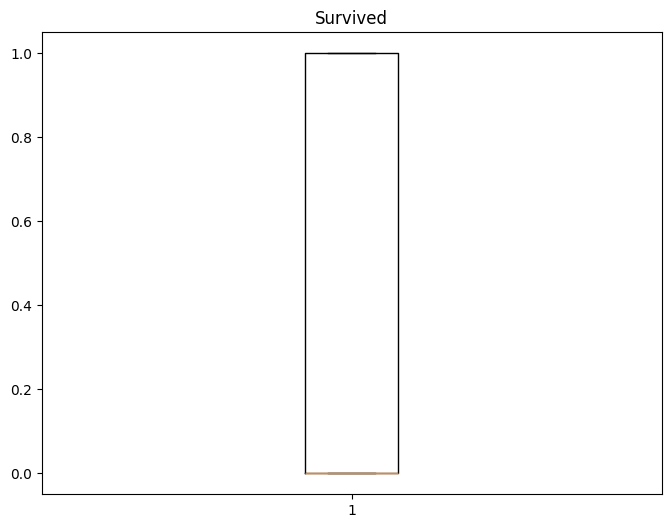

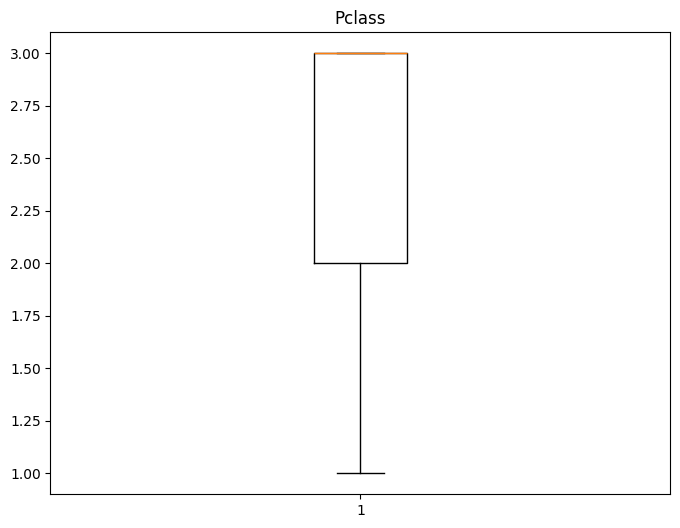

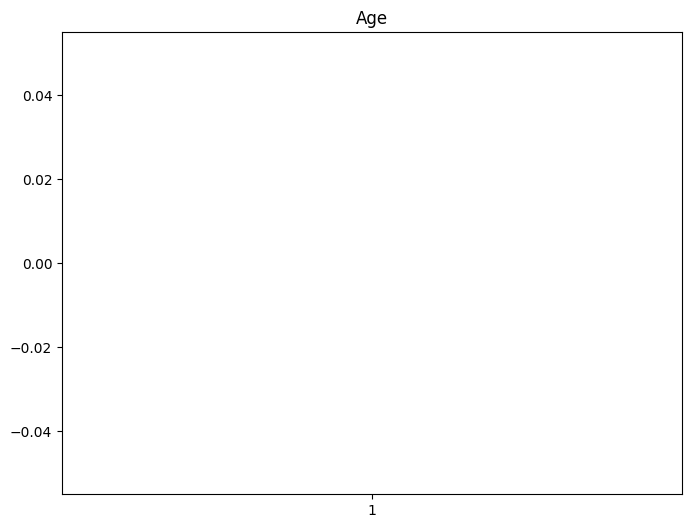

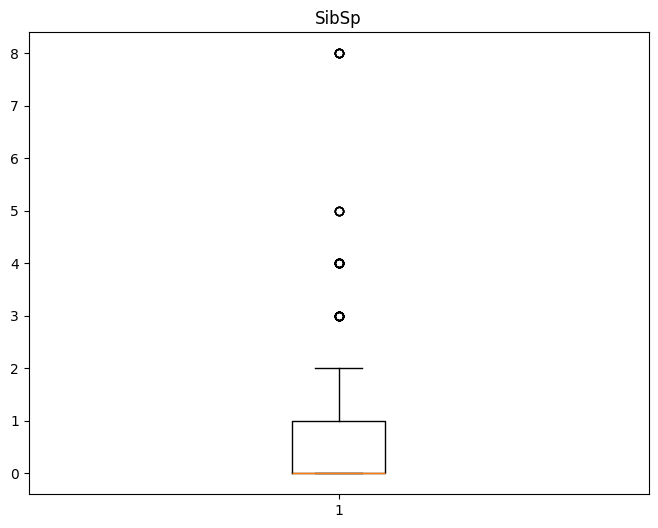

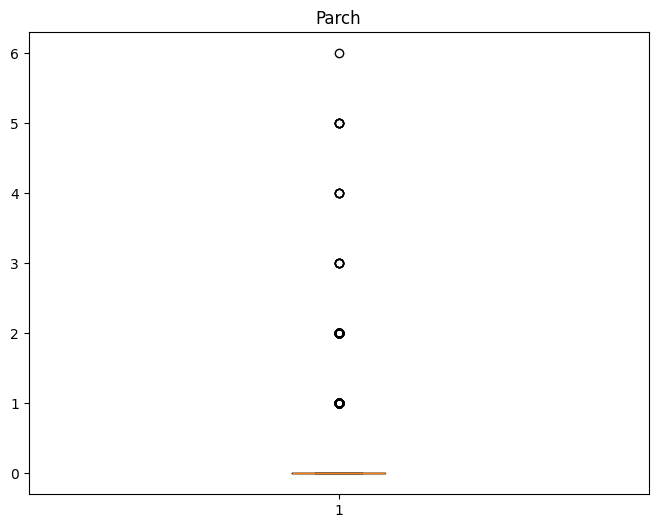

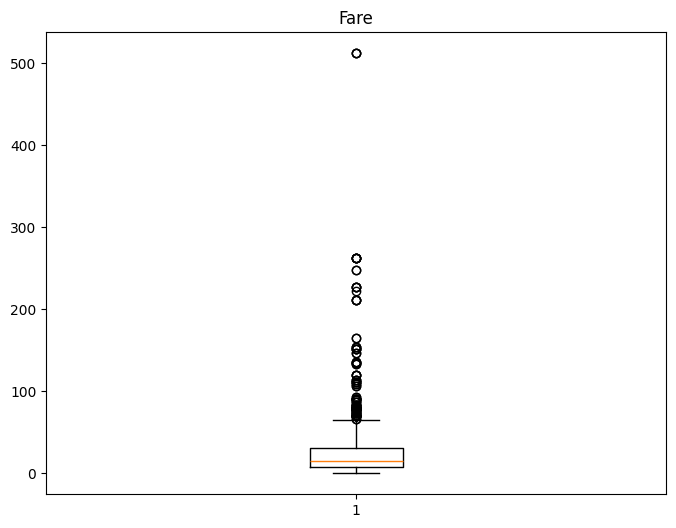

In [9]:
#box plots for df_train
import matplotlib.pyplot as plt
numerical_cols=df_train.select_dtypes(include=np.number).columns
for cols in numerical_cols:
  plt.figure(figsize=(8,6))
  plt.boxplot(df_train[cols])
  plt.title(cols)
  plt.show()


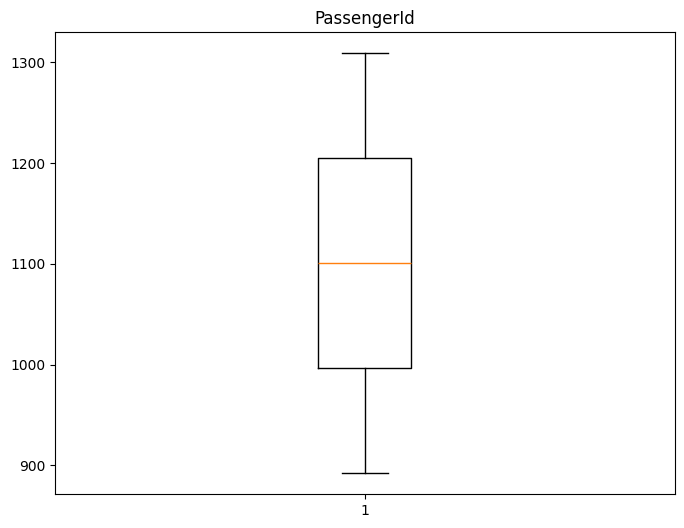

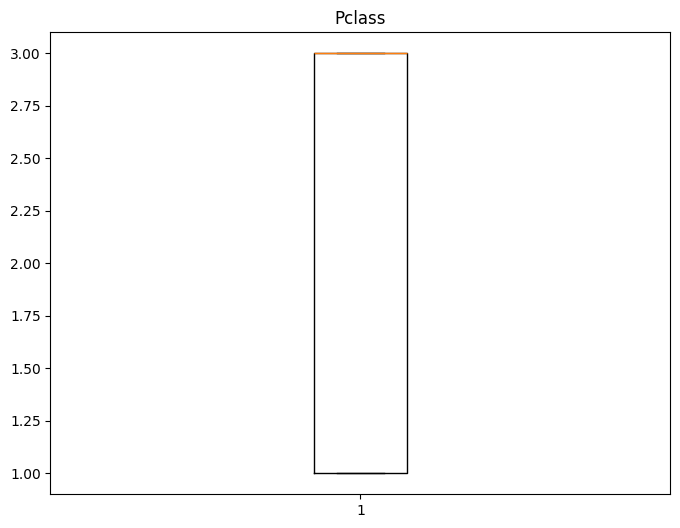

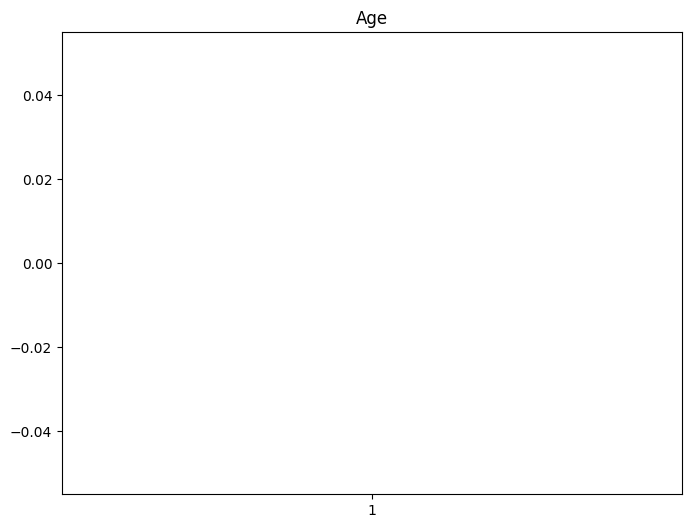

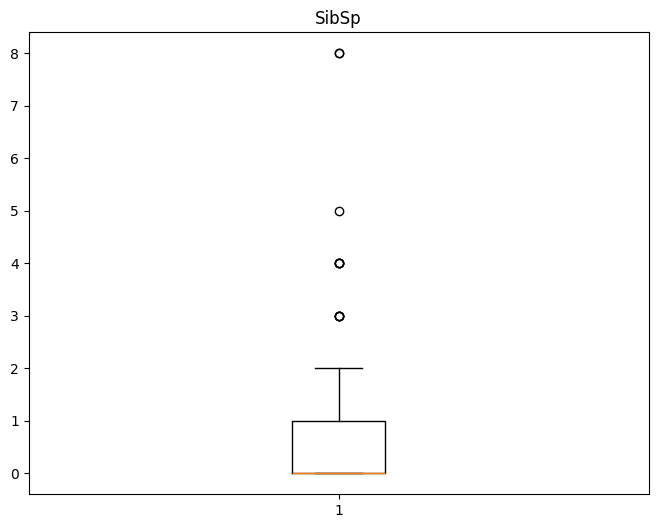

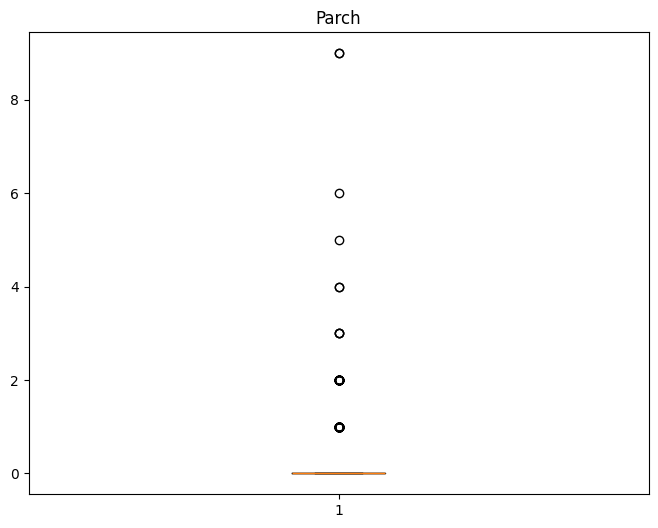

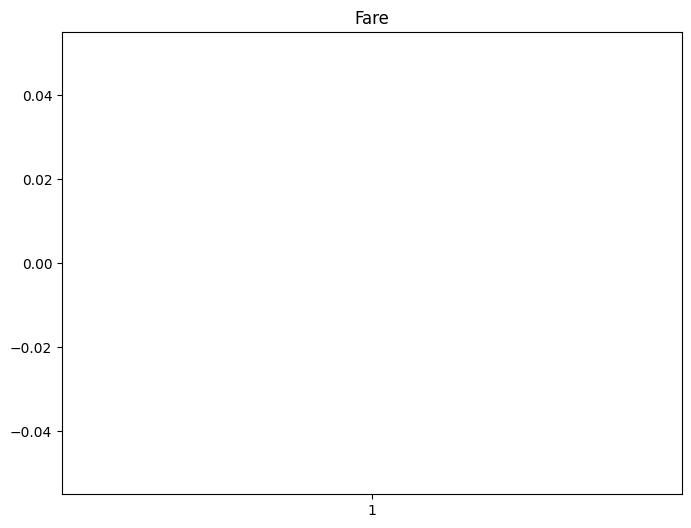

In [10]:
#box plots for df_test
import matplotlib.pyplot as plt
numerical_cols=df_test.select_dtypes(include=np.number).columns
for cols in numerical_cols:
  plt.figure(figsize=(8,6))
  plt.boxplot(df_test[cols])
  plt.title(cols)
  plt.show()

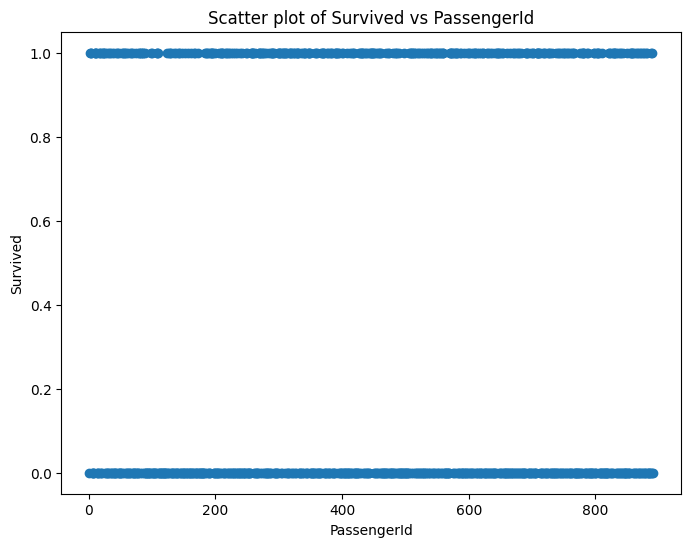

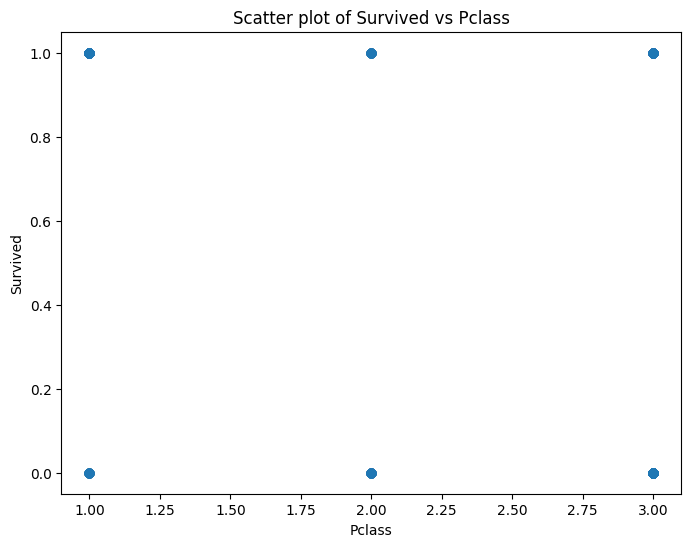

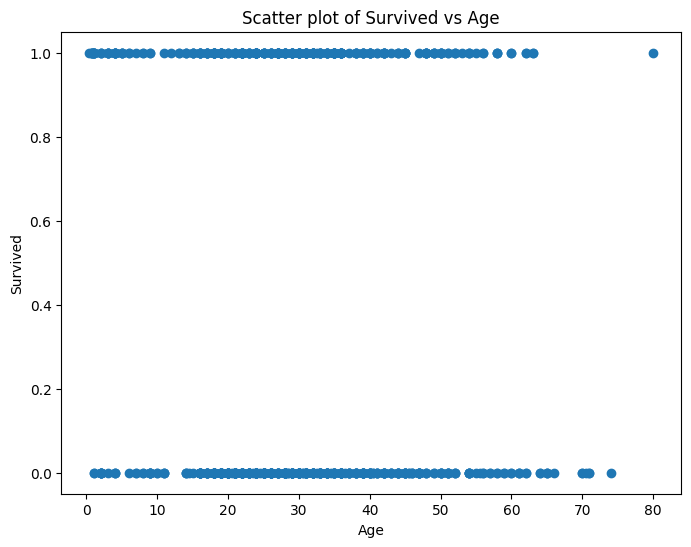

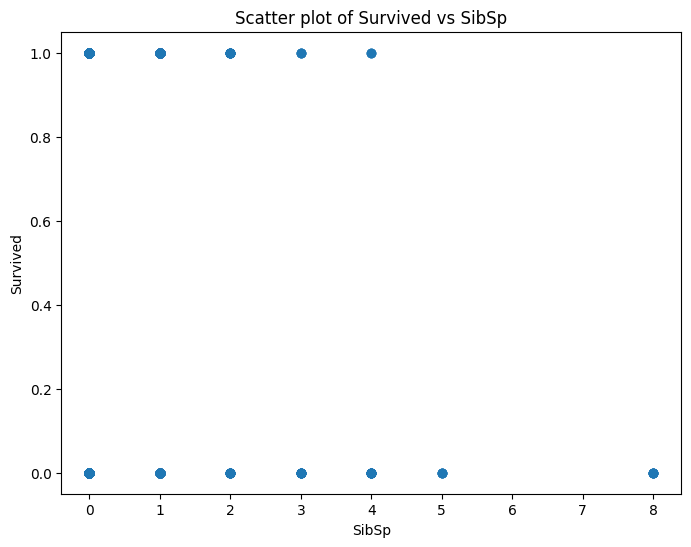

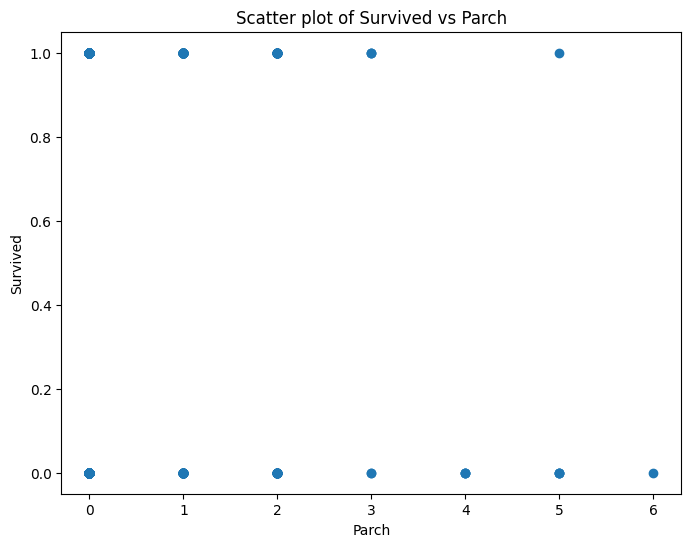

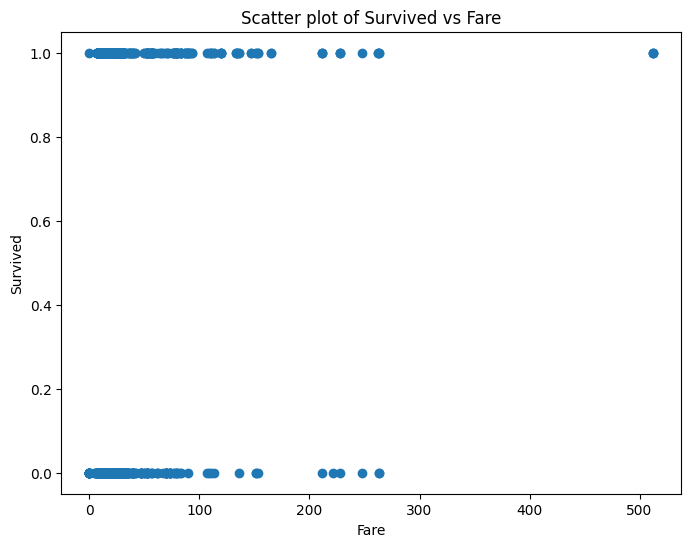

In [11]:
# Scatter plots for target vs features in df_train
import matplotlib.pyplot as plt
numerical_cols = df_train.select_dtypes(include=np.number).columns
target = 'Survived'

for col in numerical_cols:
    if col != target:
        plt.figure(figsize=(8, 6))
        plt.scatter(df_train[col], df_train[target])
        plt.xlabel(col)
        plt.ylabel(target)
        plt.title(f'Scatter plot of {target} vs {col}')
        plt.show()

<Axes: xlabel='Survived'>

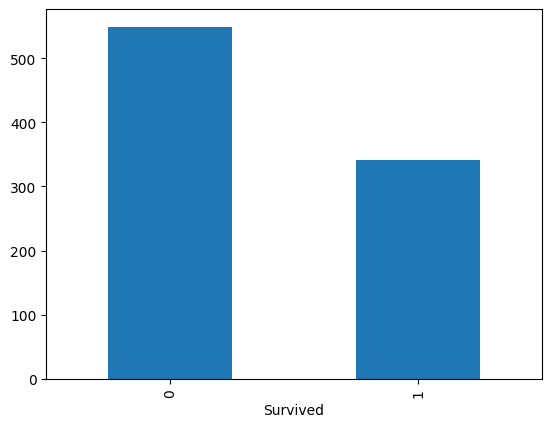

In [12]:
#bar graph for survived
df_train['Survived'].value_counts().plot(kind='bar')

#Data Preprocessing

In [13]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
#impute missing values
df_train['Age'].fillna(df_train['Age'].mean(),inplace=True)
df_train['Cabin'].fillna(df_train['Cabin'].mode()[0],inplace=True)
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0],inplace=True)
df_train.isnull().sum()

/tmp/ipython-input-2532032207.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Age'].fillna(df_train['Age'].mean(),inplace=True)
/tmp/ipython-input-2532032207.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [15]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [16]:
#impute missing values
df_test['Age'].fillna(df_test['Age'].mean(),inplace=True)
df_test['Fare'].fillna(df_test['Fare'].mean(),inplace=True)
df_test['Cabin'].fillna(df_test['Cabin'].mode()[0],inplace=True)
df_test.isnull().sum()

/tmp/ipython-input-365230814.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Age'].fillna(df_test['Age'].mean(),inplace=True)
/tmp/ipython-input-365230814.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,0


In [17]:
#detecting outliers in df_train
numerical_cols = df_train.select_dtypes(include=np.number)
q1=numerical_cols.quantile(0.25)
q3=numerical_cols.quantile(0.75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
outliers=df_train[(numerical_cols<lower_bound) | (numerical_cols>upper_bound)].dropna(axis=1, how='all')
outliers

,Age,SibSp,Parch,Fare
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,71.2833
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
886,NaN,NaN,NaN,NaN
887,NaN,NaN,NaN,NaN
888,NaN,NaN,2.0,NaN
889,NaN,NaN,NaN,NaN


In [18]:
# detecting outliers in df_test
numerical_cols_test = df_test.select_dtypes(include=np.number)
q1_test = numerical_cols_test.quantile(0.25)
q3_test = numerical_cols_test.quantile(0.75)
iqr_test = q3_test - q1_test
lower_bound_test = q1_test - 1.5 * iqr_test
upper_bound_test = q3_test + 1.5 * iqr_test
outliers_test = df_test[(numerical_cols_test < lower_bound_test) | (numerical_cols_test > upper_bound_test)].dropna(axis=1, how='all')
outliers_test

,Age,SibSp,Parch,Fare
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,62.0,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,1.0,NaN
...,...,...,...,...
413,NaN,NaN,NaN,NaN
414,NaN,NaN,NaN,108.9
415,NaN,NaN,NaN,NaN
416,NaN,NaN,NaN,NaN


In [19]:
# Remove outliers from df_test
df_test = df_test[~((numerical_cols_test < lower_bound_test) | (numerical_cols_test > upper_bound_test)).any(axis=1)]
print(f"Original shape: {df_test.shape}")
print(f"Shape after removing outliers: {df_test.shape}")

Original shape: (281, 11)
Shape after removing outliers: (281, 11)


In [20]:
# Remove outliers
df_train = df_train[~((numerical_cols < lower_bound) | (numerical_cols > upper_bound)).any(axis=1)]
print(f"Original shape: {df_train.shape}")
print(f"Shape after removing outliers: {df_train.shape}")

Original shape: (577, 12)
Shape after removing outliers: (577, 12)


In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 577 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  577 non-null    int64  
 1   Survived     577 non-null    int64  
 2   Pclass       577 non-null    int64  
 3   Name         577 non-null    object 
 4   Sex          577 non-null    object 
 5   Age          577 non-null    float64
 6   SibSp        577 non-null    int64  
 7   Parch        577 non-null    int64  
 8   Ticket       577 non-null    object 
 9   Fare         577 non-null    float64
 10  Cabin        577 non-null    object 
 11  Embarked     577 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 58.6+ KB


In [22]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_train['Name']=le.fit_transform(df_train['Name'])
df_train['Sex']=le.fit_transform(df_train['Sex'])
df_train['Ticket']=le.fit_transform(df_train['Ticket'])
df_train['Cabin']=le.fit_transform(df_train['Cabin'])
df_train['Embarked']=le.fit_transform(df_train['Embarked'])
df_train

/tmp/ipython-input-4013114469.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Name']=le.fit_transform(df_train['Name'])
/tmp/ipython-input-4013114469.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Sex']=le.fit_transform(df_train['Sex'])
/tmp/ipython-input-4013114469.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,58,1,22.000000,1,0,413,7.2500,19,2
2,3,1,3,214,0,26.000000,0,0,518,7.9250,19,2
3,4,1,1,165,0,35.000000,1,0,32,53.1000,25,2
4,5,0,3,11,1,35.000000,0,0,370,8.0500,19,2
5,6,0,3,358,1,29.699118,0,0,200,8.4583,19,1
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,512,1,25.000000,0,0,499,7.0500,19,2
886,887,0,2,354,1,27.000000,0,0,63,13.0000,19,2
887,888,1,1,183,0,19.000000,0,0,9,30.0000,14,2
889,890,1,1,42,1,26.000000,0,0,3,30.0000,29,0


In [23]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 281 entries, 0 to 416
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  281 non-null    int64  
 1   Pclass       281 non-null    int64  
 2   Name         281 non-null    object 
 3   Sex          281 non-null    object 
 4   Age          281 non-null    float64
 5   SibSp        281 non-null    int64  
 6   Parch        281 non-null    int64  
 7   Ticket       281 non-null    object 
 8   Fare         281 non-null    float64
 9   Cabin        281 non-null    object 
 10  Embarked     281 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 26.3+ KB


In [24]:
df_test['Name']=le.fit_transform(df_test['Name'])
df_test['Sex']=le.fit_transform(df_test['Sex'])
df_test['Ticket']=le.fit_transform(df_test['Ticket'])
df_test['Cabin']=le.fit_transform(df_test['Cabin'])
df_test['Embarked']=le.fit_transform(df_test['Embarked'])
df_test

/tmp/ipython-input-3391475661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Name']=le.fit_transform(df_test['Name'])
/tmp/ipython-input-3391475661.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Sex']=le.fit_transform(df_test['Sex'])
/tmp/ipython-input-3391475661.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,134,1,34.50000,0,0,108,7.8292,8,1
1,893,3,270,0,47.00000,1,0,169,7.0000,8,2
3,895,3,273,1,27.00000,0,0,103,8.6625,8,2
5,897,3,245,1,14.00000,0,0,201,9.2250,8,2
6,898,3,56,0,30.00000,0,0,114,7.6292,8,1
...,...,...,...,...,...,...,...,...,...,...,...
410,1302,3,184,0,30.27259,0,0,176,7.7500,8,1
412,1304,3,112,0,28.00000,0,0,136,7.7750,8,2
413,1305,3,238,1,30.27259,0,0,207,8.0500,8,2
415,1307,3,224,1,38.50000,0,0,256,7.2500,8,2


In [27]:
#standardization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

numerical_cols_for_scaling = df_train[['Age', 'SibSp', 'Parch', 'Fare']].columns

df_train[numerical_cols_for_scaling] = sc.fit_transform(df_train[numerical_cols_for_scaling])
df_train

/tmp/ipython-input-2353576071.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[numerical_cols_for_scaling] = sc.fit_transform(df_train[numerical_cols_for_scaling])


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,58,1,-0.909802,1.800735,0.0,413,-0.609448,19,2
2,3,1,3,214,0,-0.439745,-0.448235,0.0,518,-0.555858,19,2
3,4,1,1,165,0,0.617882,1.800735,0.0,32,3.030715,25,2
4,5,0,3,11,1,0.617882,-0.448235,0.0,370,-0.545934,19,2
5,6,0,3,358,1,-0.005046,-0.448235,0.0,200,-0.513517,19,1
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,512,1,-0.557259,-0.448235,0.0,499,-0.625326,19,2
886,887,0,2,354,1,-0.322231,-0.448235,0.0,63,-0.152939,19,2
887,888,1,1,183,0,-1.262344,-0.448235,0.0,9,1.196740,14,2
889,890,1,1,42,1,-0.439745,-0.448235,0.0,3,1.196740,29,0


In [28]:
numerical_cols_for_scaling_test = df_test[['Age', 'SibSp', 'Parch', 'Fare']].columns
df_test[numerical_cols_for_scaling_test] = sc.fit_transform(df_test[numerical_cols_for_scaling_test])
df_test

/tmp/ipython-input-260327765.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[numerical_cols_for_scaling_test] = sc.fit_transform(df_test[numerical_cols_for_scaling_test])


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,134,1,0.678902,-0.450276,0.0,108,-0.608693,8,1
1,893,3,270,0,2.270776,1.658516,0.0,169,-0.673495,8,2
3,895,3,273,1,-0.276222,-0.450276,0.0,103,-0.543572,8,2
5,897,3,245,1,-1.931771,-0.450276,0.0,201,-0.499613,8,2
6,898,3,56,0,0.105828,-0.450276,0.0,114,-0.624323,8,1
...,...,...,...,...,...,...,...,...,...,...,...
410,1302,3,184,0,0.140542,-0.450276,0.0,176,-0.614883,8,1
412,1304,3,112,0,-0.148872,-0.450276,0.0,136,-0.612929,8,2
413,1305,3,238,1,0.140542,-0.450276,0.0,207,-0.591438,8,2
415,1307,3,224,1,1.188302,-0.450276,0.0,256,-0.653957,8,2


#Building Predictive Models

In [29]:
#defining features and target variable
X_train=df_train.drop('Survived',axis=1)
Y_train=df_train['Survived']
X_test=df_test

In [37]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, log_loss

# LightGBM Classifier
lgb_model = lgb.LGBMClassifier(n_estimators=100, random_state=42, learning_rate=0.1)
lgb_model.fit(X_train, Y_train)

# Predict on the training data to calculate training accuracy
Y_pred_train_lgb = lgb_model.predict(X_train)
Y_pred_lgb = lgb_model.predict(X_test)

# Calculate accuracy on the training data
accuracy_score_train = accuracy_score(Y_train, Y_pred_train_lgb)
print(f"Training Accuracy: {accuracy_score_train}")

log_loss_train = log_loss(Y_train, Y_pred_train_lgb)
print(f"Log Loss (Training): {log_loss_train}")
# Note: To evaluate on the test set, you would need the true 'Survived' values for the test data,
# which are typically not available during the prediction phase in a real-world scenario or competition.
# You would submit your predictions (Y_pred_lgb) to be evaluated against the true test labels.

[LightGBM] [Info] Number of positive: 173, number of negative: 404
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000139 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 735
[LightGBM] [Info] Number of data points in the train set: 577, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.299827 -> initscore=-0.848123
[LightGBM] [Info] Start training from score -0.848123
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [35]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}
#create the gridsearchcv object
grid_search = GridSearchCV(estimator=lgb.LGBMClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')

#fit the gridsearchcv
grid_search.fit(X_train, Y_train)

#get the best parameters and best score
best_params = grid_search.best_params_
best_score=grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")

#evaluate model on the test data
best_model=grid_search.best_estimator_
Y_pred_lgb_best=best_model.predict(X_test)
accuracy_score_best=accuracy_score(Y_train,best_model.predict(X_train))
print(f"Training Accuracy: {accuracy_score_best}")

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 138, number of negative: 323
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000060 seconds.
You can set `force_row_wise=

In [36]:
pip install xgboost

In [38]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, log_loss


# XGBoost Classifier
xgb_model = xgb.XGBClassifier(n_estimators = 100,Learning_rate=0.1,gamma=100,reg_lambda = 10)
xgb_model.fit(X_train, Y_train)

# Predict on the training data to calculate training accuracy
Y_pred_train_xgb = xgb_model.predict(X_train)
Y_pred_xgb = xgb_model.predict(X_test)

#calculate on the training data
accuracy_score_train = accuracy_score(Y_train, Y_pred_train_xgb)
print(f"Training Accuracy: {accuracy_score_train}")

log_loss_train = log_loss(Y_train, Y_pred_train_xgb)
print(f"Log Loss (Training): {log_loss_train}")

Training Accuracy: 0.7001733102253033
Log Loss (Training): 10.806849283045525


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:47:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "Learning_rate" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [39]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 1, 0.01],
    'gamma': [10, 20, 50],
    'reg_lambda': [1, 5, 10]
}

# Create the XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, Y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best score: {best_score}")

best_model = grid_search.best_estimator_
Y_pred_xgb_best = best_model.predict(X_test)
accuracy_score_best = accuracy_score(Y_train, best_model.predict(X_train))
print(f"Training Accuracy: {accuracy_score_best}")

Best parameters: {'gamma': 10, 'learning_rate': 0.1, 'n_estimators': 100, 'reg_lambda': 1}
Best score: 0.8093703148425787
Training Accuracy: 0.8093587521663779


#Comparitative Analysis:

#Initial LGBM classifier results:

Training Accuracy: 1.0

Log Loss (Training): 2.2204460492503136e-16

#LGBM classifier results with gridsearchcv:

Best Parameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 200}

Best Score: 0.8163268365817092

Training Accuracy: 0.8682842287694974

#Initial XGBM classifier results:

Training Accuracy: 0.7001733102253033

Log Loss (Training): 10.806849283045525

#XGBM classifier results with grid search cv:

Best parameters: {'gamma': 10, 'learning_rate': 0.1, 'n_estimators': 100, 'reg_lambda': 1}

Best score: 0.8093703148425787

Training Accuracy: 0.8093587521663779

Conclusion:

* Since we do not have an target variable in the test data we can only make predictions on the testing data but I calculated the metrics for the training data and also performed cross validation and hyperparameter tuning using grid search cv for both the classifiers and compared the results for the both, i well commented the code for each and every line.